In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import pandas as pd

In [2]:
data = pd.read_csv('adult.csv')

Text(0, 0.5, 'Frequency')

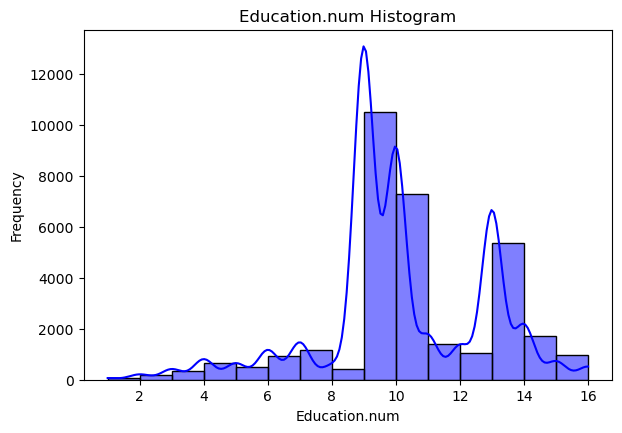

In [3]:
# Set up the figure for subplots
plt.figure(figsize=(15, 10))

# Education.num (교육 연수) histogram
plt.subplot(2, 2, 1)
sns.histplot(data['education.num'], kde=True, bins=15, color='blue')
plt.title('Education.num Histogram')
plt.xlabel('Education.num')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

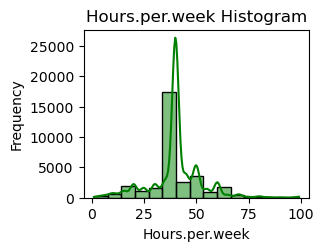

In [4]:
# Hours.per.week (주당 근로시간) histogram
plt.subplot(2, 2, 2)
sns.histplot(data['hours.per.week'], kde=True, bins=15, color='green')
plt.title('Hours.per.week Histogram')
plt.xlabel('Hours.per.week')
plt.ylabel('Frequency')

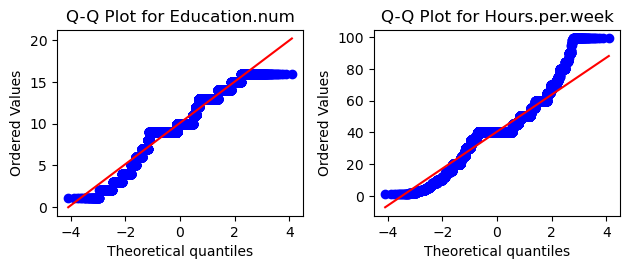

In [5]:
# Q-Q plot for Education.num
plt.subplot(2, 2, 3)
probplot(data['education.num'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Education.num')

# Q-Q plot for Hours.per.week
plt.subplot(2, 2, 4)
probplot(data['hours.per.week'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Hours.per.week')
plt.tight_layout()
plt.show()

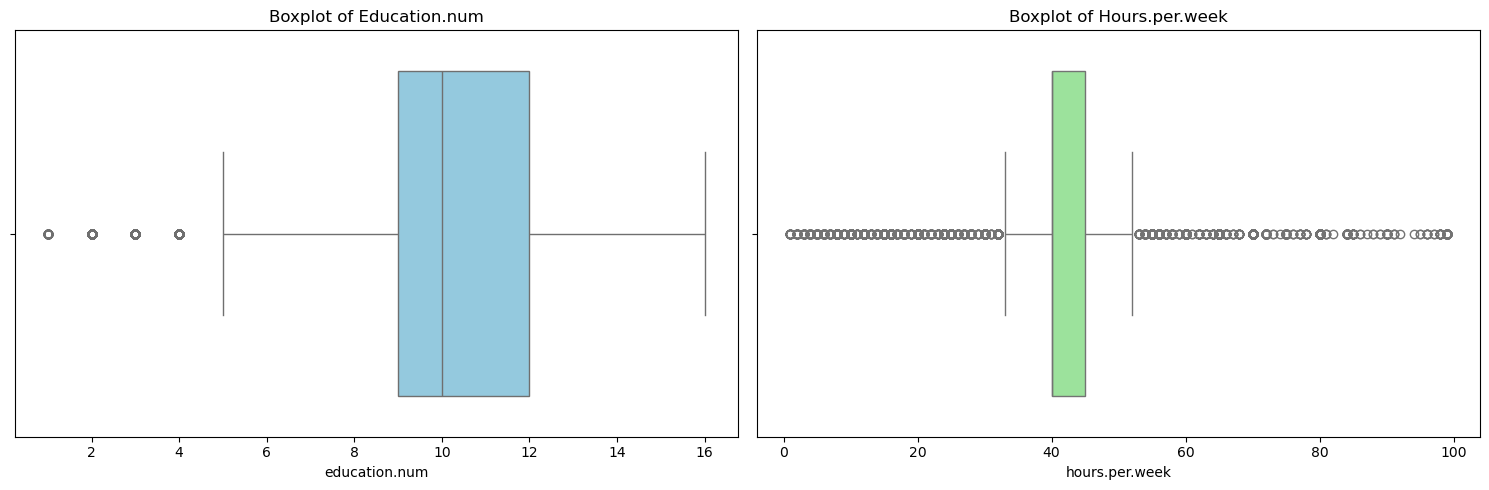

In [6]:
# Boxplots for outlier detection
plt.figure(figsize=(15, 5))

# Education.num boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=data['education.num'], color='skyblue')
plt.title('Boxplot of Education.num')

# Hours.per.week boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=data['hours.per.week'], color='lightgreen')
plt.title('Boxplot of Hours.per.week')

plt.tight_layout()
plt.show()

In [7]:
# 시각화 결과 해석
# 1. 히스토그램:
# education.num(교육 연수)은 약간의 왜도가 있지만 대체로 정규 분포에 가까운 형태를 보인다.
# hours.per.week(주당 근로시간)은 상대적으로 더 치우쳐 있으며, 몇몇 극단적인 값(이상치)이 존재할 가능성이 있다.
# 2. Q-Q 플롯:
# education.num의 경우 정규성을 대체로 만족한다.
# hours.per.week는 극단적인 끝부분에서 정규성에서 벗어나는 경향이 있다.
# 3.박스 플롯:
# education.num은 비교적 이상치가 적은 편이다.
# hours.per.week의 경우 몇몇 이상치가 눈에 띄며, 이들 값은 전처리 과정에서 다뤄야 할 것으로 보인다.

In [8]:
education_summary = data['education.num'].describe()
hours_summary = data['hours.per.week'].describe()

education_summary, hours_summary

(count    32561.000000
 mean        10.080679
 std          2.572720
 min          1.000000
 25%          9.000000
 50%         10.000000
 75%         12.000000
 max         16.000000
 Name: education.num, dtype: float64,
 count    32561.000000
 mean        40.437456
 std         12.347429
 min          1.000000
 25%         40.000000
 50%         40.000000
 75%         45.000000
 max         99.000000
 Name: hours.per.week, dtype: float64)

In [9]:
# 변수의 통계 요약
# 1. 교육 연수 (education.num):
# 평균: 10.08, 표준편차: 2.57
# 최소값: 1, 최대값: 16
# Q1 (25%): 9, Q3 (75%): 12
# => 극단적인 이상치는 드문 편으로 보인다.

# 2. 주당 근로시간 (hours.per.week):
# 평균: 40.44, 표준편차: 12.35
# 최소값: 1, 최대값: 99
# Q1 (25%): 40, Q3 (75%): 45
# => 몇몇 극단적인 이상치(1시간 또는 99시간)가 보인다.

In [10]:
# 전처리 계획
# 1. 정규화: education.num과 hours.per.week은 다른 단위로 되어 있으므로, 분석 전에 정규화나 표준화를 적용.
# 2. 이상치 제거: hours.per.week에서 IQR(Interquartile Range)을 기준으로 이상치를 제거.
# 3. 결측치 처리: 결측치는 없으므로 추가 작업 불필요.

In [11]:
# IQR method for outlier detection on hours.per.week
Q1 = hours_summary['25%']
Q3 = hours_summary['75%']
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_cleaned = data[(data['hours.per.week'] >= lower_bound) & (data['hours.per.week'] <= upper_bound)]

# Standardize education.num and hours.per.week for consistency
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_cleaned[['education.num', 'hours.per.week']] = scaler.fit_transform(
    data_cleaned[['education.num', 'hours.per.week']]
)

# Verify the cleaned data
data_cleaned[['education.num', 'hours.per.week']].describe()

C:\Users\user\AppData\Local\Temp\ipykernel_21808\2195665056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['education.num', 'hours.per.week']] = scaler.fit_transform(


,education.num,hours.per.week
count,2.355300e+04,2.355300e+04
mean,-1.906606e-16,4.537241e-16
std,1.000021e+00,1.000021e+00
min,-3.582495e+00,-2.132991e+00
25%,-4.351590e-01,-3.898495e-01
50%,-4.174199e-02,-3.898495e-01
75%,1.138509e+00,1.081911e-01
max,2.318760e+00,2.598394e+00


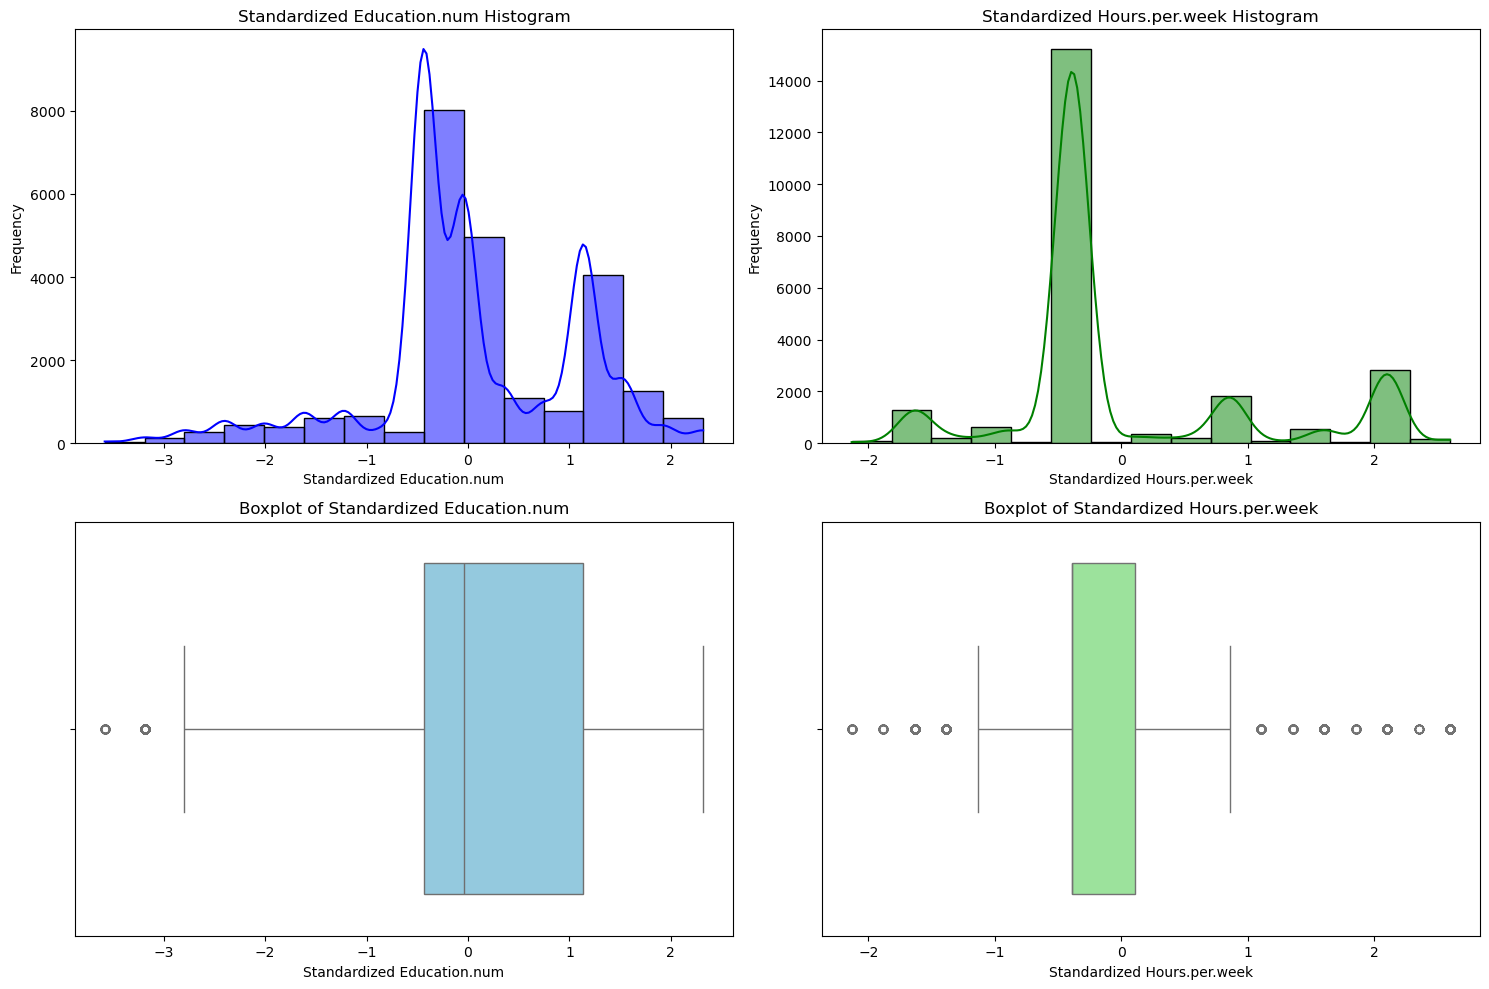

In [12]:
# 전처리 후 시각화
plt.figure(figsize=(15, 10))

# Education.num (교육 연수) histogram after standardization
plt.subplot(2, 2, 1)
sns.histplot(data_cleaned['education.num'], kde=True, bins=15, color='blue')
plt.title('Standardized Education.num Histogram')
plt.xlabel('Standardized Education.num')
plt.ylabel('Frequency')

# Hours.per.week (주당 근로시간) histogram after standardization
plt.subplot(2, 2, 2)
sns.histplot(data_cleaned['hours.per.week'], kde=True, bins=15, color='green')
plt.title('Standardized Hours.per.week Histogram')
plt.xlabel('Standardized Hours.per.week')
plt.ylabel('Frequency')

# Boxplot for Education.num
plt.subplot(2, 2, 3)
sns.boxplot(x=data_cleaned['education.num'], color='skyblue')
plt.title('Boxplot of Standardized Education.num')
plt.xlabel('Standardized Education.num')

# Boxplot for Hours.per.week
plt.subplot(2, 2, 4)
sns.boxplot(x=data_cleaned['hours.per.week'], color='lightgreen')
plt.title('Boxplot of Standardized Hours.per.week')
plt.xlabel('Standardized Hours.per.week')

plt.tight_layout()
plt.show()


In [13]:
# 전처리 결과
# 1. 이상치 제거:
# hours.per.week에서 IQR 기준으로 이상치(하한: 22.5, 상한: 62.5)를 제거
# 이상치 제거 후 데이터는 23,553개로 줄어듦

# 2. 표준화:
# education.num과 hours.per.week를 표준화하여 평균이 0, 표준편차가 1인 정규 분포로 변환

In [14]:
# 3. 가설 검증
# 가설:

# 귀무가설 (H0): 교육 연수와 주당 근로시간은 수입 수준에 유의미한 영향을 미치지 않는다.
# 대립가설 (HA): 교육 연수와 주당 근로시간은 수입 수준에 유의미한 영향을 미친다.
# 분석 계획:

# 독립성 검증: 교육 연수와 주당 근로시간이 독립적인지를 확인 (피어슨 상관계수 계산).
# 정규성 검증: income 그룹별 데이터의 정규성 확인 (Shapiro-Wilk 테스트).
# t-test / ANOVA 적용:
# 두 그룹(<=50K, >50K)의 평균 차이를 t-test로 분석.
# 두 개 이상의 독립 변수(교육 연수, 주당 근로시간)에 대한 영향을 분석하기 위해 ANOVA 적용.

In [15]:
from scipy.stats import pearsonr, shapiro

# 1. Independence check using Pearson correlation
correlation, p_value_corr = pearsonr(data_cleaned['education.num'], data_cleaned['hours.per.week'])

# 2. Normality check for income groups
low_income = data_cleaned[data_cleaned['income'] == '<=50K']
high_income = data_cleaned[data_cleaned['income'] == '>50K']

shapiro_low = shapiro(low_income['education.num'])
shapiro_high = shapiro(high_income['education.num'])

correlation, p_value_corr, shapiro_low, shapiro_high


C:\Users\user\anaconda3\envs\sda2024\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.1437097637235395,
 6.82506592935327e-109,
 ShapiroResult(statistic=0.9039525389671326, pvalue=0.0),
 ShapiroResult(statistic=0.91793292760849, pvalue=0.0))

In [16]:
# 독립성과 정규성 검증 결과
# 1. 독립성 검증:
# 교육 연수와 주당 근로시간 간의 피어슨 상관계수: 0.1437 (p-value < 0.05).
# 상관관계가 약하지만 통계적으로 유의미하다. 독립성을 엄격히 가정하기 어렵다.

# 2. 정규성 검증:
# Shapiro-Wilk 테스트 결과:
# <=50K 그룹: p-value = 0.0 (정규성을 만족하지 않음).
# >50K 그룹: p-value = 0.0 (정규성을 만족하지 않음).
# 두 그룹 모두 정규성을 만족하지 않으므로 비모수적 접근이 필요할 수 있다.

In [17]:
from scipy.stats import ttest_ind, f_oneway

# Perform t-test for education.num and hours.per.week between income groups
t_test_edu = ttest_ind(low_income['education.num'], high_income['education.num'], equal_var=False)
t_test_hours = ttest_ind(low_income['hours.per.week'], high_income['hours.per.week'], equal_var=False)

# Perform ANOVA to test overall variance explained by income groups
anova_result = f_oneway(low_income['education.num'], high_income['education.num'],
                        low_income['hours.per.week'], high_income['hours.per.week'])

t_test_edu, t_test_hours, anova_result


(Ttest_indResult(statistic=-53.680967212620445, pvalue=0.0),
 Ttest_indResult(statistic=-27.964651996419313, pvalue=4.3261095246494128e-165),
 F_onewayResult(statistic=1218.396027599234, pvalue=0.0))

In [18]:
# t-test 및 ANOVA 결과
# 1. t-test: 교육연수 : t=-53.68, p-value = 0.0 
# H0 : 수입 수준(<=50K, >50K)에 따른 교육 연수의 평균 차이가 없다.
# HA : 수입 수준(<=50K, >50K)에 따른 교육 연수의 평균 차이가 있다.-> 교육 연수는 수입 수준에 매우 유의미한 차이를 보인다.

#            주당 근로시간 : t=-27.96, p-value=4.33x10^-165 
# H0 : 수입 수준(<=50K, >50K)에 따른 주당 근로시간의 평균 차이가 없다.
# HA : 수입 수준(<=50K, >50K)에 따른 주당 근로시간의 평균 차이가 있다.
# 주당 근로시간도 수입 수준에 매우 유의미한 차이를 보인다.

In [19]:
# 2. ANOVA : F = 1218.40, p-value = 0.0 
# H0 : 교육 연수와 주당 근로시간은 수입 수준(<=50K, >50K)에 유의미한 영향을 미치지 않는다.
# HA : 교육 연수와 주당 근로시간은 수입 수준(<=50K, >50K)에 유의미한 영향을 미친다.
# -> 교육 연수와 주당 근로시간이 모두 수입 수준의 변화를 설명하는 데 유의미한 역할을 함.

In [20]:
# 참고 : python에선 부동소수점 한계로 p 값이 10^-300 이하로 작으면 이를 0으로 출력할 수 있다.
# 따라서 실제로는 0에 가깝지만 정확히 0이 아니다.

In [21]:
# 보통 ANOVA를 수행한 후, 3개 이상의 그룹간 차이를 비교하고, 차이가 있으면 t-test를 진행하지만
# 본 분석 목적은 교육 연수와 주당 근로시간이 수입 수준에 미치는 영향을 살피는 것.
# 수입수준은 (<=50K, >50K)인 명목형 변수로 두 그룹으로 나뉘어 있으므로, 교육 연수, 주당 근로시간에 대해 독립적으로 그룹 간 차이를 확인하려고 t-test를 우선 적용

In [22]:
# 이후 전체적으로 두 변수가 함께 수입 수준에 미치는 영향을 살펴보기 위해 ANOVA 적용